In [2]:
import pandas as pd
from collections import Counter

In [113]:
g = pd.read_csv('physionet_data/S002_whole_df.csv')
print(g.iloc[2000])

TIMESTAMP               31.25
BVP                     -0.33
ACC_X                   -60.0
ACC_Y                     1.0
ACC_Z                   -19.0
TEMP                    35.66
EDA                  0.066601
HR                      73.03
IBI                  0.796875
Sleep_Stage                 P
Obstructive_Apnea         NaN
Central_Apnea             NaN
Hypopnea                  NaN
Multiple_Events           NaN
Name: 2000, dtype: object


In [143]:
def preprocess(file):

    '''
    input: 
    A csv file from the DREAMT dataset
    
    return: a dataframes containing 4 sleep stages (W, N1, N2, R), no mising values and certain columns dropped with high null ratios
    '''

    df = pd.read_csv(file).drop(columns=['Obstructive_Apnea', 'Central_Apnea', 'Hypopnea', 'Multiple_Events'])

    df = df[df['Sleep_Stage'] != 'P']
    
    df['IBI'] = df['IBI']

    return df.reset_index(drop=True)

In [144]:
df1 = preprocess('physionet_data/S002_whole_df.csv')
df2 = preprocess('physionet_data/S064_whole_df.csv')
df3 = preprocess('physionet_data/S065_whole_df.csv')

In [145]:
dfs = [df1, df2, df3]

for df in dfs:
    print(len(df))
    print(Counter(df['Sleep_Stage']))

1426561
Counter({'N2': 641280, 'W': 508801, 'R': 153600, 'N1': 122880})
1524481
Counter({'N2': 846720, 'R': 268800, 'N1': 226560, 'W': 182401})
1620481
Counter({'W': 675840, 'N2': 568321, 'R': 184320, 'N1': 159360, 'N3': 32640})


In [146]:
df1

,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,9174.000000,25.61,-22.0,-61.0,5.0,32.09,0.065320,72.85,1.062500,W
1,9174.015625,23.45,-22.0,-61.0,5.0,32.09,0.065320,72.85,1.062500,W
2,9174.031250,21.99,-22.0,-62.0,4.0,32.09,0.065320,72.85,1.062500,W
3,9174.046875,21.14,-22.0,-62.0,4.0,32.09,0.065320,72.85,1.062500,W
4,9174.062500,20.52,-19.0,-61.0,10.0,32.09,0.065320,72.85,1.062500,W
...,...,...,...,...,...,...,...,...,...,...
1426556,31463.937500,120.17,-33.0,-24.0,50.0,35.37,0.142168,78.13,1.046875,W
1426557,31463.953125,106.78,-33.0,-24.0,50.0,35.37,0.142168,78.13,1.046875,W
1426558,31463.968750,98.52,-33.0,-24.0,51.0,35.37,0.142168,78.13,1.046875,W
1426559,31463.984375,95.02,-33.0,-24.0,51.0,35.37,0.142168,78.13,1.046875,W


In [122]:
df2

,index,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,636352,9943.000000,11.05,-25.0,47.0,36.0,31.61,2.328972,74.45,781.250,W
1,636353,9943.015625,9.98,-25.0,47.0,36.0,31.61,2.328972,74.45,781.250,W
2,636354,9943.031250,9.08,-26.0,47.0,35.0,31.61,2.328972,74.45,781.250,W
3,636355,9943.046875,8.25,-26.0,47.0,35.0,31.61,2.328972,74.45,781.250,W
4,636356,9943.062500,7.38,-25.0,47.0,36.0,31.61,2.328972,74.45,781.250,W
...,...,...,...,...,...,...,...,...,...,...,...
1524476,2160828,33762.937500,-71.08,-26.0,-15.0,57.0,34.53,2.353032,66.10,890.625,W
1524477,2160829,33762.953125,-71.90,-26.0,-15.0,57.0,34.53,2.353032,66.10,890.625,W
1524478,2160830,33762.968750,-69.42,-26.0,-15.0,57.0,34.53,2.353032,66.10,890.625,W
1524479,2160831,33762.984375,-63.36,-26.0,-15.0,57.0,34.53,2.353032,66.10,890.625,W


In [123]:
import os
participant_id = os.path.basename('/Users/daviddechantsreiter/Desktop/GitHub/sleep-ml/physionet_data/S055_whole_df.csv').split('.')

print(participant_id)

['S055_whole_df', 'csv']


In [124]:
def calculate_BVP_features(window):
    
    bvp = window['BVP'].values
    
    return {
        'BVP_mean': round(np.mean(bvp), 2),
        'BVP_std': round(np.std(bvp), 2),
        'BVP_min': np.min(bvp),
        'BVP_max': np.max(bvp),
        'BVP_range': round(np.max(bvp) - np.min(bvp), 2),
        'BVP_median': np.median(bvp)
    }

def calculate_HRV_features(window):

    ibi_values = window['BVP'].values

    # Calculate standard HRV time-domain metrics ------------------------------
    # Standard deviation of NN intervals
    sdnn = np.std(ibi_values) 
    
    # Calculate successive differences between intervals
    successive_diffs = np.diff(ibi_values)
    # RMSSD: Root Mean Square of Successive Differences
    rmssd = np.sqrt(np.mean(successive_diffs**2))
    
    # pNN50: Percentage of successive differences greater than 50ms
    pnn50 = 100 * np.sum(np.abs(successive_diffs) > 50) / len(successive_diffs)
    
    # Median of NN intervals
    median_nni = np.median(ibi_values)

    '''
    # Calculate standard HRB frqeuncey-domain metrics ---------------------------
    # Use neurokit2 for HRV frequency analysis
    hrv_freq = nk.hrv_frequency(ibi_values, sampling_rate=None, show=False)
        
    # Extract key features
    lf_power = hrv_freq['HRV_LF'].iloc[0]  # Low Frequency power
    hf_power = hrv_freq['HRV_HF'].iloc[0]  # High Frequency power
    lf_hf_ratio = hrv_freq['HRV_LFHF'].iloc[0]  # LF/HF ratio
    '''


    return {
        'SDNN': sdnn,
        'RMSSD': rmssd,
        'pNN50': pnn50,
        'median_nni': median_nni
        #'lf_power': lf_power,
        #'hf_power': hf_power,
        #'lf_hf_ratio': lf_hf_ratio
    }

def calculate_ACC_features(window: pd.DataFrame):

    acc_x = window['ACC_X'].values
    acc_y = window['ACC_Y'].values
    acc_z = window['ACC_Z'].values

    # Calculate magnitude of acceleration
    acc_mag = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)

    # Calculate magnitude
    acc_magnitude_mean = np.mean(acc_mag)
    acc_magnitude_std = np.std(acc_mag)

    # Threshold = mean + 1 standard deviation
    threshold = acc_magnitude_mean + acc_magnitude_std 
    above_threshold = acc_mag > threshold 


    movement_density = np.mean(acc_mag > threshold) # Movement density (proportion of samples above threshold)
    transitions = np.diff(above_threshold.astype(int))
    burst_count = np.sum(transitions == 1) # A burst is defined as a sequence of consecutive samples above threshold

    return {
        'x_std': np.std(acc_x),
        'y_std': np.std(acc_y),
        'z_std': np.std(acc_z),
        'mag_mean': np.mean(acc_mag),
        'mag_std': np.std(acc_mag),
        'mag_max': np.max(acc_mag),
        'movement_density': movement_density,
        'burst_count': burst_count
    }

def calculate_EDA_features(window: pd.DataFrame):

    eda = window['EDA'].values
    
    # Basic statistics
    eda_mean = np.mean(eda)
    eda_std = np.std(eda)

    # Calculate trend (slope of linear regression)
    x = np.arange(len(eda))
    if len(eda) > 1:
        slope, _, _, _, _ = stats.linregress(x, eda)
        eda_trend = slope
    else:
        eda_trend = 0

    return {
        'EDA_mean': eda_mean,
        'EDA_std': eda_std,
        'EDA_trend': eda_trend
    }

def calculate_TEMP_features(window: pd.DataFrame):
    
    temp = window['TEMP'].values

    # Basic statistics
    temp_mean = np.mean(temp)
    temp_std = np.std(temp)
    
    # Calculate slope
    x = np.arange(len(temp))
    if len(temp) > 1:
        slope, _, _, _, _ = stats.linregress(x, temp)
        temp_slope = slope
    else:
        temp_slope = 0
    
    return {
        'TEMP_mean': temp_mean,
        'TEMP_std': temp_std,
        'TEMP_slope': temp_slope
    }
    
def calculate_HR_features(window: pd.DataFrame):

    hr = window['HR'].values

    # Basic statistics
    hr_mean = np.mean(hr)
    hr_std = np.std(hr)
    hr_range = np.max(hr) - np.min(hr)
    
    # Calculate trend
    x = np.arange(len(hr))
    if len(hr) > 1:
        slope, _, _, _, _ = stats.linregress(x, hr)
        hr_trend = slope
    else:
        hr_trend = 0
    
    return {
        'HR_mean': hr_mean,
        'HR_std': hr_std,
        'HR_range': hr_range,
        'HR_trend': hr_trend
    }

In [147]:
window = df1[:1920]

window

,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,9174.000000,25.61,-22.0,-61.0,5.0,32.09,0.06532,72.85,1.062500,W
1,9174.015625,23.45,-22.0,-61.0,5.0,32.09,0.06532,72.85,1.062500,W
2,9174.031250,21.99,-22.0,-62.0,4.0,32.09,0.06532,72.85,1.062500,W
3,9174.046875,21.14,-22.0,-62.0,4.0,32.09,0.06532,72.85,1.062500,W
4,9174.062500,20.52,-19.0,-61.0,10.0,32.09,0.06532,72.85,1.062500,W
...,...,...,...,...,...,...,...,...,...,...
1915,9203.921875,113.20,-18.0,-63.0,-1.0,32.07,0.06532,80.75,0.953125,W
1916,9203.937500,109.25,-18.0,-63.0,-1.0,32.07,0.06532,80.75,0.953125,W
1917,9203.953125,105.73,-18.0,-63.0,-1.0,32.07,0.06532,80.75,0.953125,W
1918,9203.968750,103.70,-17.0,-63.0,-1.0,32.07,0.06532,80.75,0.953125,W


In [126]:
import numpy as np

d = calculate_BVP_features(window)

print(d)

{'BVP_mean': 2.91, 'BVP_std': 156.69, 'BVP_min': -1257.38, 'BVP_max': 705.59, 'BVP_range': 1962.97, 'BVP_median': 2.3449999999999998}


In [128]:
import neurokit2 as nk

#d = calculate_HRV_features(window)
 
    
# Convert IBI values to peak indices
ibi_values = window['IBI']
peaks = nk.intervals_to_peaks(ibi_values)

len(peaks)

1921

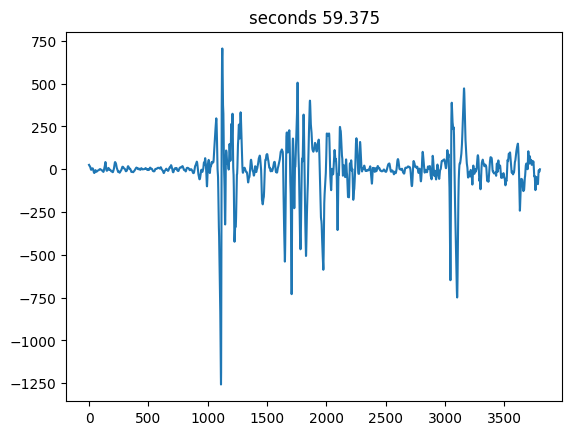

In [138]:
import matplotlib.pyplot as plt


plt.title(f'seconds {3800/64}')
plt.plot(df1['BVP'][:3800])

#for x in peaks:
    #plt.axvline(x=x, color='red', alpha=0.1)

plt.show()

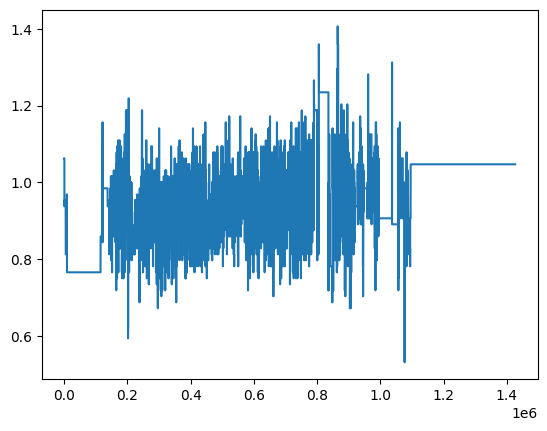

In [149]:
plt.plot(df1['IBI'])

In [134]:
def calculate_HRV_features(window):

    ibi_values = window['IBI'].values

    # Calculate standard HRV time-domain metrics ------------------------------
    # Standard deviation of NN intervals
    sdnn = np.std(ibi_values) 
    
    # Calculate successive differences between intervals
    successive_diffs = np.diff(ibi_values)
    # RMSSD: Root Mean Square of Successive Differences
    rmssd = np.sqrt(np.mean(successive_diffs**2))
    
    # pNN50: Percentage of successive differences greater than 50ms
    pnn50 = 100 * np.sum(np.abs(successive_diffs) > 50) / len(successive_diffs)
    
    # Median of NN intervals
    median_nni = np.median(ibi_values)

    # Calculate standard HRB frqeuncey-domain metrics ---------------------------
    # Use neurokit2 for HRV frequency analysis
    hrv_freq = nk.hrv_frequency(ibi_values, sampling_rate=None, show=False)
        
    # Extract key features
    lf_power = hrv_freq['HRV_LF'].iloc[0]  # Low Frequency power
    hf_power = hrv_freq['HRV_HF'].iloc[0]  # High Frequency power
    lf_hf_ratio = hrv_freq['HRV_LFHF'].iloc[0]  # LF/HF ratio

    return {
        'SDNN': sdnn,
        'RMSSD': rmssd,
        'pNN50': pnn50,
        'median_nni': median_nni,
        'lf_power': lf_power,
        'hf_power': hf_power,
        'lf_hf_ratio': lf_hf_ratio
    }

In [135]:
g = calculate_HRV_features(window)
print(g)

ValueError: NeuroKit error: _hrv_sanitize_input(): The peak indices passed were detected as non-consecutive. You might have passed RR intervals instead of peaks. If so, convert RRIs into peaks using nk.intervals_to_peaks().

In [104]:
f

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,976.728723,273.168003,NaN,NaN,NaN,NaN,NaN,NaN,386.472494,390.733379,...,1.7492,4.463435,1.02005,0.625743,0.742098,0.693426,1.951047,2.028098,3.111425,1.181827


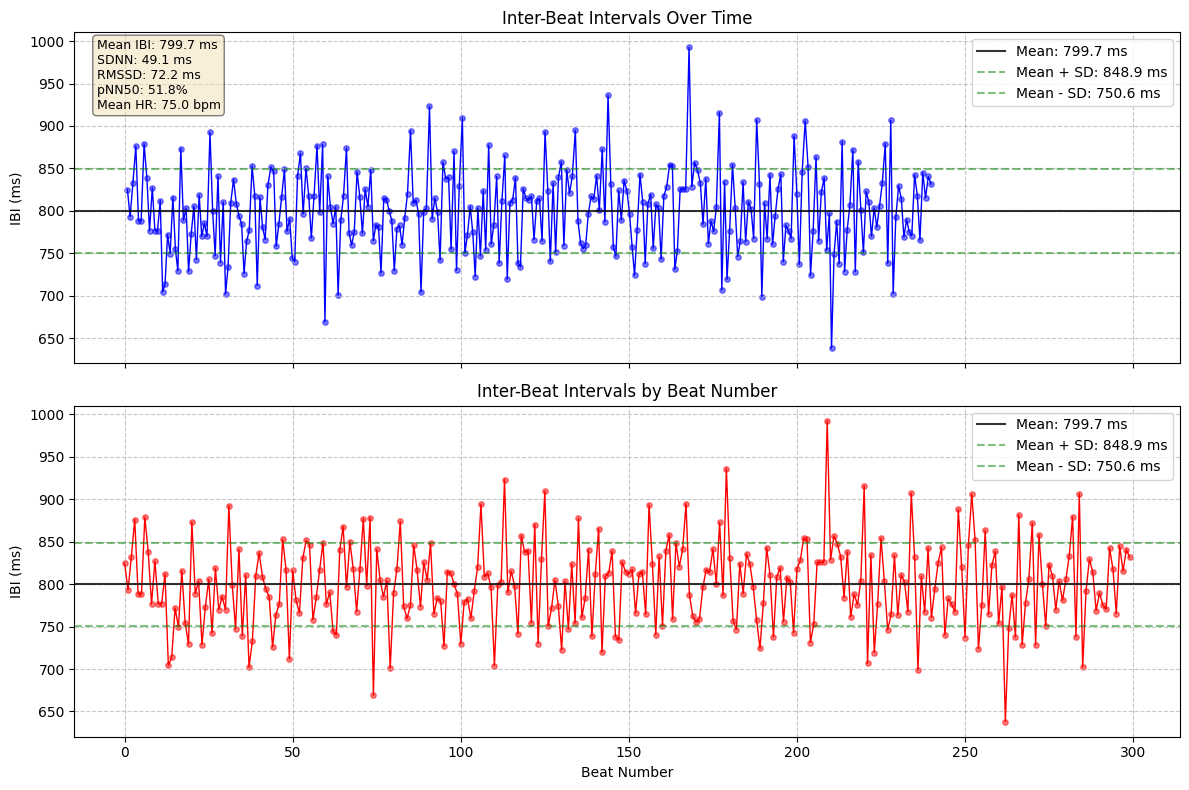

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example: Create sample IBI data (replace with your actual data)
# Option 1: Random sample data
np.random.seed(42)  # For reproducibility
num_beats = 300
# Generate realistic IBI values (typical values range between 600-1000ms)
ibi_values = np.random.normal(loc=800, scale=50, size=num_beats)

# Option 2: If you have actual IBI data in a DataFrame named 'window':
# ibi_values = window['IBI'].values

# Create a time axis (in seconds) based on the cumulative sum of IBIs
time_axis = np.cumsum(ibi_values) / 1000  # Convert ms to seconds
beat_numbers = np.arange(len(ibi_values))

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: IBI values over time
ax1.plot(time_axis, ibi_values, 'b-', linewidth=1)
ax1.scatter(time_axis, ibi_values, color='blue', s=15, alpha=0.5)
ax1.set_ylabel('IBI (ms)')
ax1.set_title('Inter-Beat Intervals Over Time')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: IBI values by beat number
ax2.plot(beat_numbers, ibi_values, 'r-', linewidth=1)
ax2.scatter(beat_numbers, ibi_values, color='red', s=15, alpha=0.5)
ax2.set_xlabel('Beat Number')
ax2.set_ylabel('IBI (ms)')
ax2.set_title('Inter-Beat Intervals by Beat Number')
ax2.grid(True, linestyle='--', alpha=0.7)

# Add horizontal lines for mean and standard deviation
mean_ibi = np.mean(ibi_values)
std_ibi = np.std(ibi_values)
for ax in [ax1, ax2]:
    ax.axhline(y=mean_ibi, color='k', linestyle='-', alpha=0.8, label=f'Mean: {mean_ibi:.1f} ms')
    ax.axhline(y=mean_ibi + std_ibi, color='g', linestyle='--', alpha=0.5, label=f'Mean + SD: {mean_ibi + std_ibi:.1f} ms')
    ax.axhline(y=mean_ibi - std_ibi, color='g', linestyle='--', alpha=0.5, label=f'Mean - SD: {mean_ibi - std_ibi:.1f} ms')
    ax.legend(loc='best')

# Calculate additional HRV metrics for display
rmssd = np.sqrt(np.mean(np.diff(ibi_values)**2))
pnn50 = 100 * np.sum(np.abs(np.diff(ibi_values)) > 50) / len(np.diff(ibi_values))

# Add text box with HRV metrics
textstr = '\n'.join((
    f'Mean IBI: {mean_ibi:.1f} ms',
    f'SDNN: {std_ibi:.1f} ms',
    f'RMSSD: {rmssd:.1f} ms',
    f'pNN50: {pnn50:.1f}%',
    f'Mean HR: {60000/mean_ibi:.1f} bpm'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('ibi_plot.png', dpi=300)
plt.show()

In [177]:
print(df2['IBI'][:1920].nunique())

8


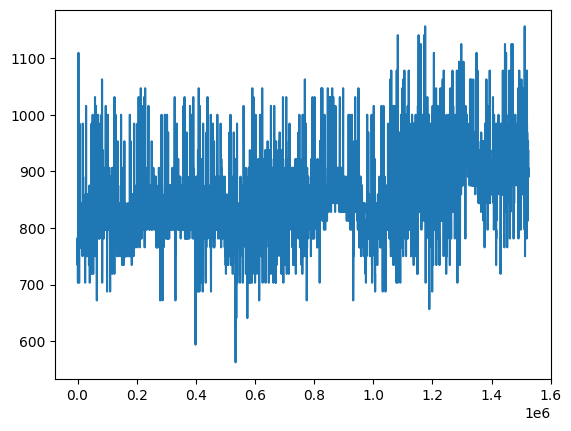

In [137]:
plt.plot(df2['IBI'])
plt.show()

In [173]:
dfg = pd.read_csv('/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/downsampled_data/S002_whole_df.csv')

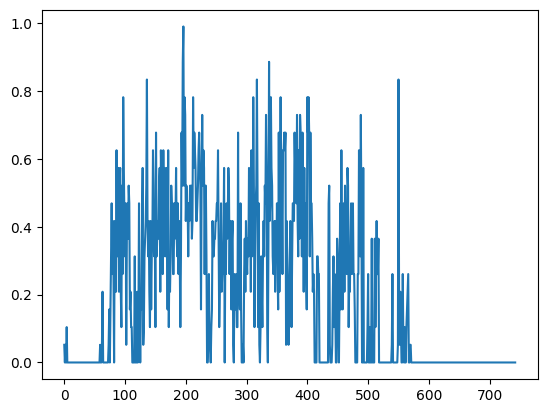

In [175]:
plt.plot(dfg['pNN50'])

plt.show()

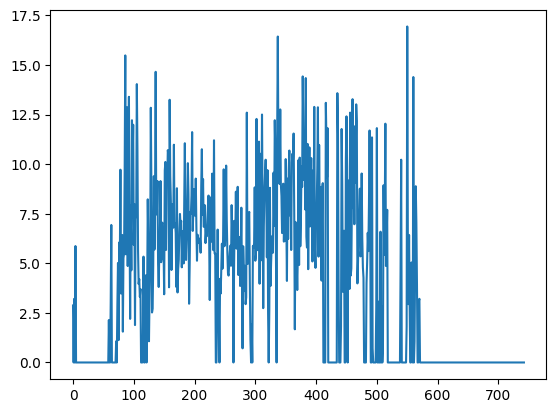

In [176]:
plt.plot(dfg['RMSSD'])

plt.show()

0.0

In [158]:
dfg.columns

Index(['participant_id', 'window_start_time', 'window_end_time', 'sleep_stage',
       'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max', 'BVP_range', 'BVP_median',
       'SDNN', 'RMSSD', 'pNN50', 'median_nni', 'x_std', 'y_std', 'z_std',
       'mag_mean', 'mag_std', 'mag_max', 'movement_density', 'burst_count',
       'EDA_mean', 'EDA_std', 'EDA_trend', 'TEMP_mean', 'TEMP_std',
       'TEMP_slope', 'HR_mean', 'HR_std', 'HR_range', 'HR_trend'],
      dtype='object')

In [178]:
ibi_values = df1['IBI'][:1920]

successive_diffs = np.diff(ibi_values)

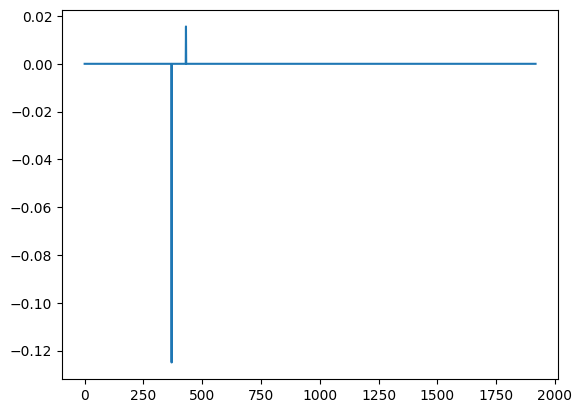

In [181]:
plt.plot(successive_diffs)

In [185]:
import glob

file_paths = glob.glob(os.path.join('/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data', '*.csv'))



file_paths

['/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S083_whole_df.csv',
 '/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S084_whole_df.csv',
 '/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S091_whole_df.csv',
 '/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S096_whole_df.csv',
 '/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S069_whole_df.csv',
 '/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S058_whole_df.csv',
 '/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S068_whole_df.csv',
 '/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S097_whole_df.csv',
 '/Users/daviddechantsreiter/Desktop/WPI/Courses/Machine Learning/sleep-ml/physionet_data/S090_whole_df.csv',
 '/Users/d